# DBSCAN CLUSTERING

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
dataset= pd.read_csv('Mall_Customers.csv')
X= dataset.iloc[:, [3,4]].values

In [73]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=7, min_samples=4)
model= dbscan.fit(X)
labels= model.labels_

In [74]:
labels

array([-1,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0, -1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1,  3, -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4, -1,  7,  6,  4, -1,  7,
        6,  7,  6,  4,  6,  4,  6,  7,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [75]:
from sklearn import metrics
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

In [76]:
sample_cores[dbscan.core_sample_indices_]=True

In [77]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [78]:
print(metrics.silhouette_score(X,labels))

0.21933639835030405


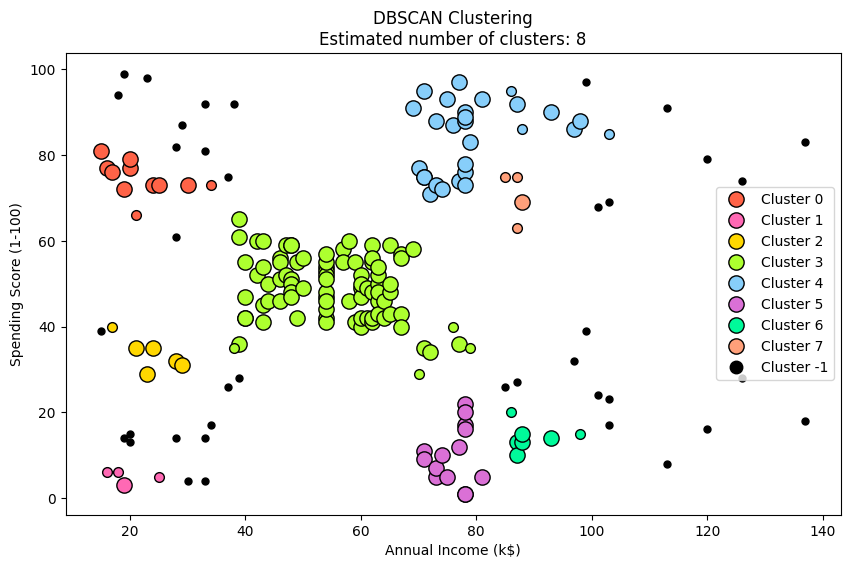

In [79]:
# Define a list of bright colors for each cluster
from matplotlib.colors import ListedColormap
bright_colors = ListedColormap(['#FF6347', '#FF69B4', '#FFD700', '#ADFF2F', '#87CEFA', '#DA70D6', '#00FA9A', '#FFA07A'])
plt.figure(figsize=(10, 6))

# Plotting the clusters
unique_labels = set(labels)

for k in unique_labels:
    # Assign black color to noise
    if k == -1:
        col = 'k'  # Black for noise points
        marker_size = 5
    else:
        col = bright_colors(k % bright_colors.N)  # Use cyclic bright colors
        marker_size = 7

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=marker_size + 4, label=f'Cluster {k}')

    # Plot non-core points
    xy = X[class_member_mask & ~sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=marker_size)

plt.title(f'DBSCAN Clustering\nEstimated number of clusters: {n_clusters}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc="best")
plt.show()